In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from collections import Counter


In [4]:
df = pd.read_csv('/content/yelp.csv')
df.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


# **EXPLORATORY DATA ANALYSIS**


In [14]:
#General overview and descriptive stats of the data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   business_id     10000 non-null  object
 1   date            10000 non-null  object
 2   review_id       10000 non-null  object
 3   stars           10000 non-null  int64 
 4   text            10000 non-null  object
 5   type            10000 non-null  object
 6   user_id         10000 non-null  object
 7   cool            10000 non-null  int64 
 8   useful          10000 non-null  int64 
 9   funny           10000 non-null  int64 
 10  processed_text  10000 non-null  object
dtypes: int64(4), object(7)
memory usage: 859.5+ KB
None
              stars          cool        useful         funny
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       3.777500      0.876800      1.409300      0.701300
std        1.214636      2.067861      2.336647      1.907942
min        1.00

In [15]:
#Checking for missing values
print(df.isnull().sum())


business_id       0
date              0
review_id         0
stars             0
text              0
type              0
user_id           0
cool              0
useful            0
funny             0
processed_text    0
dtype: int64


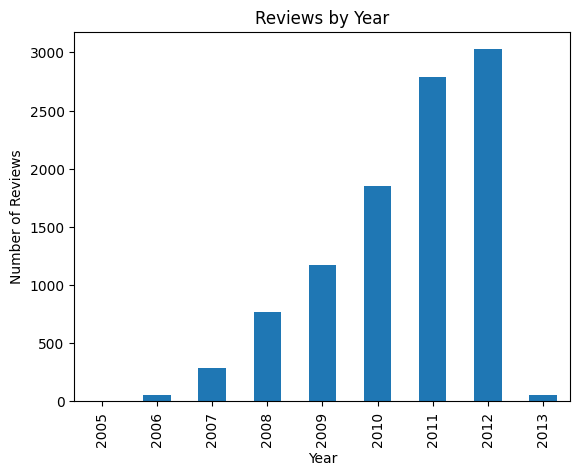

In [16]:
# Converting date to date time format for extracting parts of the date eg month, years etc
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Reviews by year
df['year'] = df['date'].dt.year
reviews_by_year = df['year'].value_counts().sort_index()
reviews_by_year.plot(kind='bar', title='Reviews by Year', xlabel='Year', ylabel='Number of Reviews')
plt.show()

<ipython-input-17-702c5cae3270>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=df, palette='viridis')


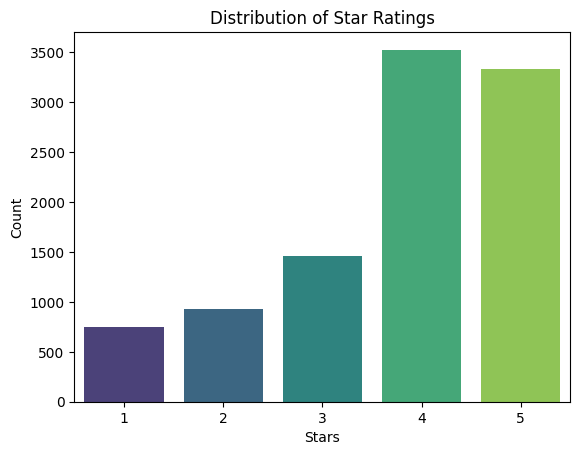

In [17]:
# Distribution of star ratings
sns.countplot(x='stars', data=df, palette='viridis')
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

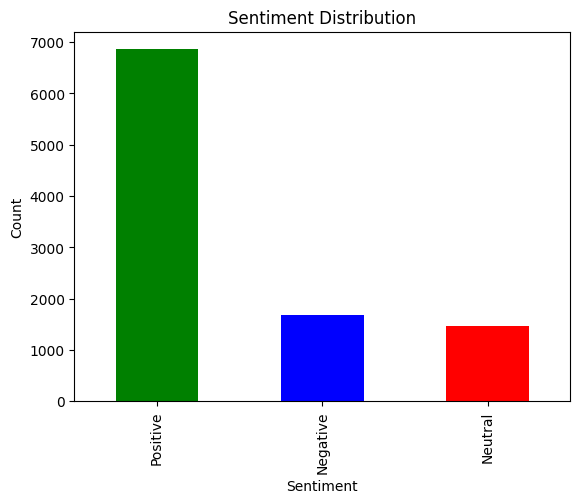

In [5]:
# Map ratings to sentiment categories
df['sentiment'] = df['stars'].apply(lambda x: 'Positive' if x >= 4 else 'Neutral' if x == 3 else 'Negative')
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Distribution', color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


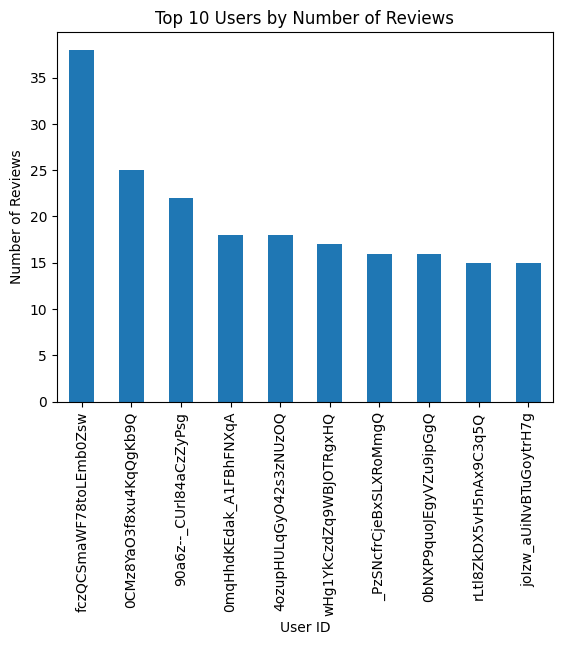

In [ ]:
#Top 10 users by reviews
top_users = df['user_id'].value_counts().head(10)
top_users.plot(kind='bar', title='Top 10 Users by Number of Reviews')
plt.xlabel('User ID')
plt.ylabel('Number of Reviews')
plt.show()


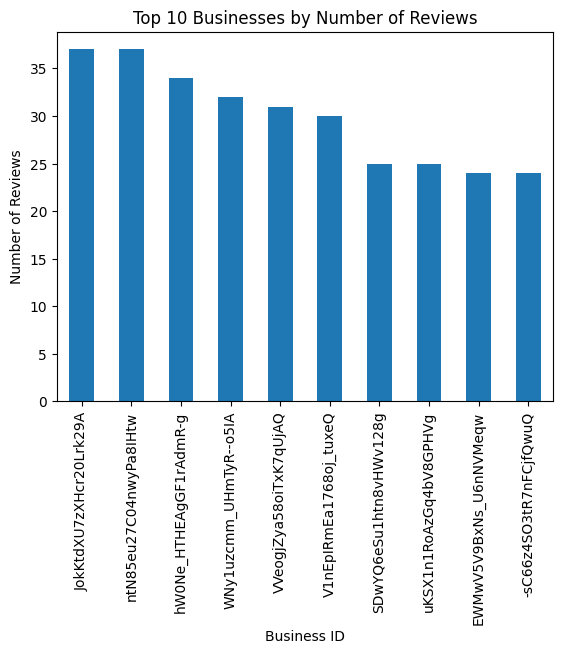

In [ ]:
# Top businesses by review count
top_businesses = df['business_id'].value_counts().head(10)
top_businesses.plot(kind='bar', title='Top 10 Businesses by Number of Reviews')
plt.xlabel('Business ID')
plt.ylabel('Number of Reviews')
plt.show()


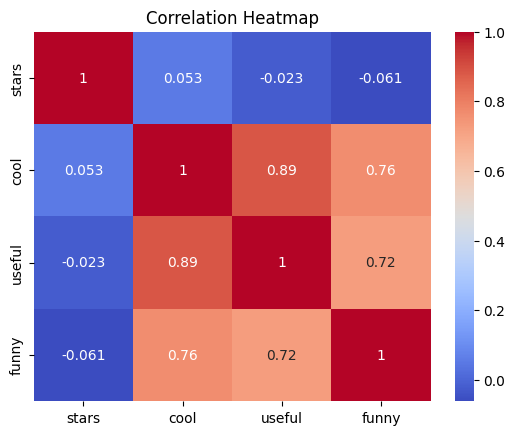

In [ ]:
# Correlation between numerical features
correlation_matrix = df[['stars', 'cool', 'useful', 'funny']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


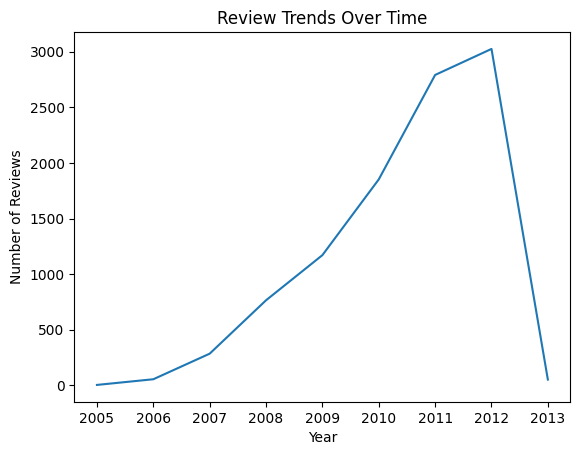

In [ ]:
# Reviews per year
reviews_by_year.plot(kind='line', title='Review Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()


# **DATA PREPROCESSING**

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


**Tokenization, Stopwards And Lemmatization**

In [7]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphanumeric tokens, and lemmatize
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(processed_tokens)

# Applying preprocessing on text varibale of our data
df['processed_text'] = df['text'].apply(preprocess_text)
print(df[['text', 'processed_text']].head())

                                                text  \
0  My wife took me here on my birthday for breakf...   
1  I have no idea why some people give bad review...   
2  love the gyro plate. Rice is so good and I als...   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...   
4  General Manager Scott Petello is a good egg!!!...   

                                      processed_text  
0  wife took birthday breakfast excellent weather...  
1  idea people give bad review place go show plea...  
2  love gyro plate rice good also dig candy selec...  
3  rosie dakota love chaparral dog park convenien...  
4  general manager scott petello good egg go deta...  


**Generate Features Using TF-IDF**

In [8]:
# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

tfidf_features = tfidf.fit_transform(df['processed_text'])

tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf.get_feature_names_out())
print(tfidf_df.head())


    10  100  1000  101  10pm        11  110  11am   12  120  ...  yup  zero  \
0  0.0  0.0   0.0  0.0   0.0  0.000000  0.0   0.0  0.0  0.0  ...  0.0   0.0   
1  0.0  0.0   0.0  0.0   0.0  0.104889  0.0   0.0  0.0  0.0  ...  0.0   0.0   
2  0.0  0.0   0.0  0.0   0.0  0.000000  0.0   0.0  0.0  0.0  ...  0.0   0.0   
3  0.0  0.0   0.0  0.0   0.0  0.000000  0.0   0.0  0.0  0.0  ...  0.0   0.0   
4  0.0  0.0   0.0  0.0   0.0  0.000000  0.0   0.0  0.0  0.0  ...  0.0   0.0   

   zia  zin  zinburger  zinc  zipps  zone  zoo  zucchini  
0  0.0  0.0        0.0   0.0    0.0   0.0  0.0       0.0  
1  0.0  0.0        0.0   0.0    0.0   0.0  0.0       0.0  
2  0.0  0.0        0.0   0.0    0.0   0.0  0.0       0.0  
3  0.0  0.0        0.0   0.0    0.0   0.0  0.0       0.0  
4  0.0  0.0        0.0   0.0    0.0   0.0  0.0       0.0  

[5 rows x 5000 columns]


**Generate Features Using Word2Vec**

In [ ]:
from gensim.models import Word2Vec

tokenized_text = df['processed_text'].apply(word_tokenize)

word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Generate sentence embeddings by averaging word vectors
def get_sentence_vector(sentence):
    words = sentence.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)

df['word2vec_features'] = df['processed_text'].apply(get_sentence_vector)
print(df['word2vec_features'].head())


0    [-0.20254575, 0.57764053, 0.23768204, 0.061741...
1    [-0.34330246, 0.40970555, 0.09711677, 0.125980...
2    [-0.12478953, 0.46001804, 0.39197838, -0.00262...
3    [-0.20007575, 0.54836166, 0.21712932, -0.09497...
4    [-0.35353896, 0.32772502, 0.101547025, 0.09413...
Name: word2vec_features, dtype: object


**Generate Features Using GloVe**

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-12-06 16:52:07--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-12-06 16:52:07--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-12-06 16:52:07--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# Load GloVe embeddings
embedding_dict = {}
with open("glove.6B.100d.txt", 'r', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_dict[word] = vector

# Generate sentence embeddings using GloVe
def get_glove_sentence_vector(sentence):
    words = sentence.split()
    word_vectors = [embedding_dict[word] for word in words if word in embedding_dict]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)

df['glove_features'] = df['processed_text'].dropna().apply(get_glove_sentence_vector)
print(df['glove_features'].head())


0    [-0.2014909, 0.24966523, 0.21627533, -0.081506...
1    [-0.09203788, 0.2446884, 0.28824797, -0.202952...
2    [-0.2263763, 0.315468, 0.12265579, -0.26219535...
3    [-0.10858794, 0.32244867, 0.36571604, -0.15252...
4    [-0.14498365, 0.1678896, 0.3791367, -0.1441172...
Name: glove_features, dtype: object


# **SENTIMENT ANALYSIS**

**Sentiment Analysis using DistillBert**

In [7]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [1]:
!pip install --upgrade transformers

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from torch.utils.data import DataLoader
from datasets import Dataset
import torch
from sklearn.preprocessing import LabelEncoder


In [9]:
import os
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_API_KEY"] = "your_api_key_here"


In [10]:
# Spliting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['sentiment'], test_size=0.2, random_state=42)

In [18]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Tokenization with reduced max_length
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=64)  # Reduced to 64
val_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=64)

# Create PyTorch datasets with encoded labels
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])  # Using encoded labels
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_encodings, y_train_encoded)
val_dataset = SentimentDataset(val_encodings, y_test_encoded)

# Load pre-trained model
distilbert_model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=len(label_encoder.classes_)
)

# Training arguments with optimizations
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",  # Evaluate once per epoch
    learning_rate=2e-5,
    per_device_train_batch_size=8,  # Reduced batch size for faster iterations
    per_device_eval_batch_size=32,  # Reduced batch size for evaluation
    num_train_epochs=1,  # Reduced epochs for quick experimentation
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,  # Less frequent logging
    save_strategy="epoch",
    load_best_model_at_end=True,
    fp16=True,  # Enable mixed precision training
)

# Trainer setup
trainer = Trainer(
    model=distilbert_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

# Train DistilBERT model
trainer.train()

# Evaluate DistilBERT model
distilbert_preds = trainer.predict(val_dataset).predictions
distilbert_preds = torch.argmax(torch.tensor(distilbert_preds), axis=1)

# Decode predictions back to original labels
distilbert_preds = label_encoder.inverse_transform(distilbert_preds.cpu().numpy()) # Decode predictions

distilbert_accuracy = accuracy_score(y_test, distilbert_preds)
distilbert_precision = precision_score(y_test, distilbert_preds, average='weighted') # Calculate precision with decoded predictions
distilbert_recall = recall_score(y_test, distilbert_preds, average='weighted')
distilbert_f1 = f1_score(y_test, distilbert_preds, average='weighted')

print("\nDistilBERT Model Performance:")
print(f"Accuracy: {distilbert_accuracy}, Precision: {distilbert_precision}, Recall: {distilbert_recall}, F1 Score: {distilbert_f1}")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-18-64c011b67202>:53: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.647800,0.562207



DistilBERT Model Performance:
Accuracy: 0.782, Precision: 0.7471955635922115, Recall: 0.782, F1 Score: 0.7464807047574331


**Sentiment Analysis Using Logistic Regression (with TF-IDF)**

In [ ]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform train and test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Make predictions
lr_preds = lr_model.predict(X_test_tfidf)

# Evaluation metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, lr_preds)
precision_lr = precision_score(y_test, lr_preds,average='weighted')
recall_lr = recall_score(y_test, lr_preds,average='weighted')
f1_lr = f1_score(y_test, lr_preds,average='weighted')

print(f"Logistic Regression Model - Accuracy: {accuracy_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1 Score: {f1_lr:.4f}")


Logistic Regression Model - Accuracy: 0.7850, Precision: 0.7542, Recall: 0.7850, F1 Score: 0.7500


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

print(f"Best hyperparameters for Logistic Regression: {grid_search.best_params_}")


Best hyperparameters for Logistic Regression: {'C': 1}


In [ ]:
#Best Logistics Regression
best_lr_model = LogisticRegression(C=1,max_iter=1000 )
best_lr_model.fit(X_train_tfidf, y_train)

# Make predictions
lr_preds = best_lr_model.predict(X_test_tfidf)

# Evaluation metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, lr_preds)
precision_lr = precision_score(y_test, lr_preds,average='weighted')
recall_lr = recall_score(y_test, lr_preds,average='weighted')
f1_lr = f1_score(y_test, lr_preds,average='weighted')

print(f"Logistic Regression Model - Accuracy: {accuracy_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1 Score: {f1_lr:.4f}")


Logistic Regression Model - Accuracy: 0.7850, Precision: 0.7542, Recall: 0.7850, F1 Score: 0.7500
